In [ ]:
!pip install --upgrade google-cloud-aiplatform

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd

In [ ]:
so_df = pd.read_csv('so_database_app.csv')
so_df.tail()
so_df["category"].unique()

array(['python', 'html', 'r', 'css'], dtype=object)

In [ ]:
import pickle

In [ ]:
with open('embeddings.pkl', 'rb') as file:
  question_embeddings = pickle.load(file)

In [ ]:
print("Shape: " + str(question_embeddings.shape))
print(question_embeddings)

Shape: (2000, 768)
[[-0.03986521  0.04167737 -0.02370772 ... -0.03541378  0.0656606
  -0.02355085]
 [-0.02723383 -0.00095524 -0.05294612 ... -0.02715452  0.04011759
  -0.0603106 ]
 [-0.00526765 -0.01794366 -0.02017778 ... -0.00475395  0.06137369
  -0.043244  ]
 ...
 [-0.01093377 -0.02231715 -0.04403903 ... -0.03530848  0.00023448
  -0.00523797]
 [ 0.01671442 -0.03004181 -0.06963667 ... -0.03284265  0.03439931
  -0.06602592]
 [ 0.02085042 -0.0085346  -0.06279176 ... -0.04506842  0.04859819
  -0.00016782]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
clustering_dataset = question_embeddings[:1000]

In [ ]:
n_clusters = 2
kmeans = KMeans(
  n_clusters=n_clusters,
  random_state=0,
  n_init = 'auto').fit(clustering_dataset)

In [ ]:
kmeans_labels = kmeans.labels_

In [ ]:
PCA_model = PCA(n_components=2)
PCA_model.fit(clustering_dataset)
new_values = PCA_model.transform(clustering_dataset)
new_values

array([[-0.18218137,  0.20361187],
       [-0.17575692,  0.03540852],
       [-0.19366458,  0.13824033],
       ...,
       [ 0.11016167,  0.04411365],
       [ 0.04865313, -0.09688794],
       [ 0.17443505,  0.03189724]])

In [ ]:
!pip install ipympl
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 61.5 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=0d3fa46f6c1d5bdbb93b339772f17c5a8a9db81d566c6b30ffdf1f766c012aa1
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
import matplotlib.pyplot as plt
import mplcursors

def clusters_2D(x_values, y_values, labels, kmeans_labels):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         c = kmeans_labels,
                         cmap='Set1',
                         alpha=0.5,
                         edgecolors='k',
                         s = 40)  # Change the denominator as per n_clusters

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #axes
    ax.set_title('Embedding clusters visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels.category[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.95) # Set annotation's background color
        sel.annotation.set_fontsize(14)

    plt.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

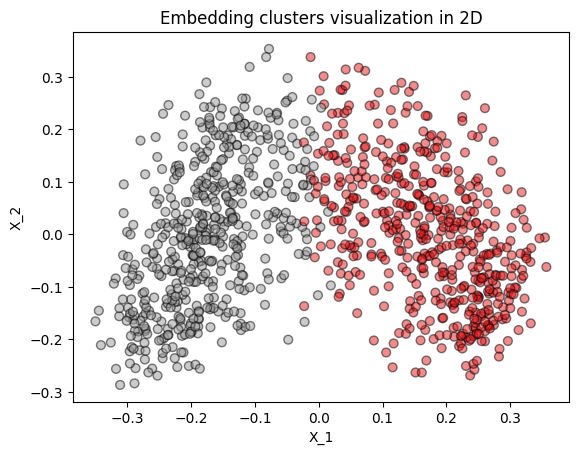

In [ ]:
clusters_2D(x_values = new_values[:,0], y_values = new_values[:,1],
            labels = so_df[:1000], kmeans_labels = kmeans_labels)